# Problem 1


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def simulate_disc_drops(d, n_tosses = 4444444):
    y_positions = np.random.uniform(0, 1, n_tosses) # y coordinate of disc center within two lines
    P = {1: 0, 2: 0, 3: 0} # total number of cdisc rossing 1, 2, 3 lines
    
    for y in y_positions:
        r = d / 2

        if d <= 1:
            # Diameter smaller than 1, cannot cross more than 1 line
            P[2], P[3] = 0, 0
            dmin = min(y, 1 - y)
            if dmin < r:
                P[1] += 1
        elif d <= 2:
            # Diameter smaller than 2, always cross at least one line but cannot cross more than 2 lines
            P[1], P[3] = n_tosses, 0
            dmax = max(y, 1 - y)
            if dmax < r:
                P[2] += 1
        else:
            # Diameter greater than 2, always cross at least 2 lines
            P[1], P[2] = n_tosses, n_tosses
            dmin = min(y, 1 - y)
            if dmin + 1 < r:
                P[3] += 1
    return P

In [9]:
# Run simulation for given diameters
diameters = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0]
p1 = []
p2 = []
p3 = []
total_tosses = 4444444

for d in diameters:
    print(f"Simulating diameter {d}...")
    P = simulate_disc_drops(d)
    # Calculate possibility by (number of disc crossing n line / total number of disc)
    p1.append(P[1] / total_tosses)
    p2.append(P[2] / total_tosses)
    p3.append(P[3] / total_tosses)

Simulating diameter 0.1...
Simulating diameter 0.2...
Simulating diameter 0.3...
Simulating diameter 0.4...
Simulating diameter 0.5...
Simulating diameter 0.6...
Simulating diameter 0.7...
Simulating diameter 0.8...
Simulating diameter 0.9...
Simulating diameter 1.0...
Simulating diameter 1.5...
Simulating diameter 2.0...
Simulating diameter 3.0...


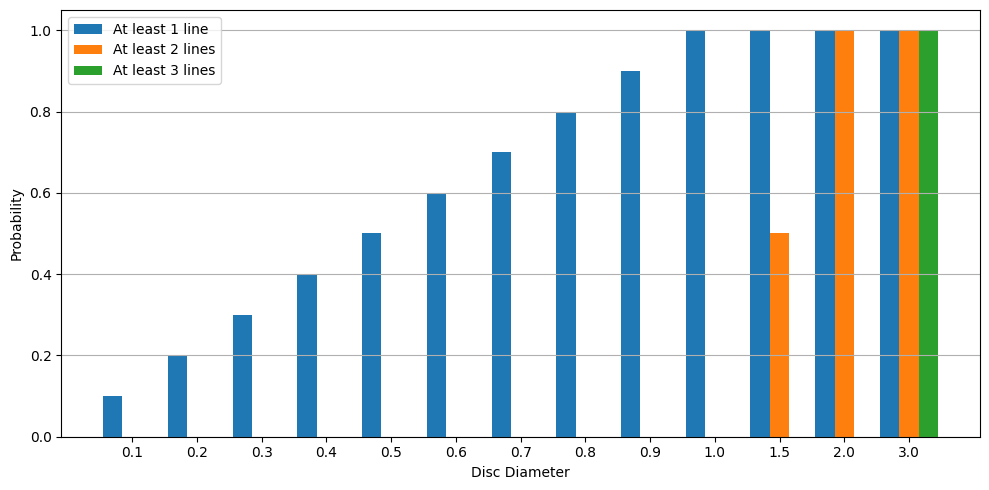


Diameter  |  1 line  |  2 lines  |  3 lines
--------------------------------------------
d =  0.1  | 0.099838 | 0.000000 | 0.000000
d =  0.2  | 0.199873 | 0.000000 | 0.000000
d =  0.3  | 0.300018 | 0.000000 | 0.000000
d =  0.4  | 0.400278 | 0.000000 | 0.000000
d =  0.5  | 0.500225 | 0.000000 | 0.000000
d =  0.6  | 0.599825 | 0.000000 | 0.000000
d =  0.7  | 0.700222 | 0.000000 | 0.000000
d =  0.8  | 0.800033 | 0.000000 | 0.000000
d =  0.9  | 0.899940 | 0.000000 | 0.000000
d =  1.0  | 1.000000 | 0.000000 | 0.000000
d =  1.5  | 1.000000 | 0.500203 | 0.000000
d =  2.0  | 1.000000 | 1.000000 | 0.000000
d =  3.0  | 1.000000 | 1.000000 | 1.000000


In [10]:
# Plot results
x = np.arange(len(diameters))
width = 0.3  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width, p1, width, label='At least 1 line')
ax.bar(x, p2, width, label='At least 2 lines')
ax.bar(x + width, p3, width, label='At least 3 lines')

# Customize the plot
ax.set_xlabel('Disc Diameter')
ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(diameters)
ax.legend()
ax.grid(True, axis='y')  # Only show horizontal grid lines

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Print all probabilities
print("\nDiameter  |  1 line  |  2 lines  |  3 lines")
print("-" * 44)
for d, p_one, p_two, p_three in zip(diameters, p1, p2, p3):
    print(f"d = {d:4.1f}  | {p_one:7.6f} | {p_two:8.6f} | {p_three:8.6f}")

# Problem 2

In [11]:
# Function to reduce points to those inside the rose curve
def inside_rose(points):
    x = points[:, 0]
    y = points[:, 1]
    return (x**2 + y**2)**3 <= 4 * x**2 * y**2

# Function to reduce points to those inside the rectangle
def inside_rectangle(points):
    x = points[:, 0]
    y = points[:, 1]
    return (np.abs(x) <= 0.5) & (np.abs(y) <= np.sqrt(2) / 4)

# Perform transformation (translate and rotation) to a list of points
def transformation(points, state):
    cx, cy, alpha = state
    translated = points - np.array([cx, cy]) 
    rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]]) 
    return np.dot(translated, rotation_matrix)  

# Create a grid of points in a rectangle
def create_rectangle_grid_points(n): 
    x_points = np.linspace(-0.5, 0.5, n) 
    y_points = np.linspace(-0.5, 0.5, n)    
    cell_area = (x_points[1] - x_points[0])**2
    x, y = np.meshgrid(x_points, y_points)   
    grid = np.column_stack((x.ravel(), y.ravel())) 
    
    # Return points inside the rectangle and the area of each grid cell
    return grid[inside_rectangle(grid)], cell_area

In [21]:
# Find the maximum overlap area of the rectangle inside the rose curve
def find_maximum_area(initial_state, sig = 0.3, n_iterations = 10000, grid_length = 400):
    current_state = initial_state
    rectangle_points, cell_area = create_rectangle_grid_points(grid_length)
    transformed_points = transformation(rectangle_points, current_state) 
    mask = inside_rose(transformed_points) # boolean array to filter points inside the rose curve
    current_cell_count = np.sum(mask) # number of points inside the rose curve

    best_state = current_state
    best_cell_count = current_cell_count
    
    count = 0
    max_count = n_iterations / 5
    for i in range(n_iterations):
        T = 1 - count / max_count # temperature based on numebr of steps without improvement
        current_sig = sig * T # use temperature to control the step size
        x, y, theta = current_state
        # Generate new state within the observed boundary of the curve
        new_x = np.clip(x + np.random.uniform(-current_sig, current_sig), -0.8, 0.8)
        new_y = np.clip(y + np.random.uniform(-current_sig, current_sig), -0.8, 0.8)
        # Due to the symmetry of the curve, we only need to consider the range of 0 to 0.25*pi
        new_t = (theta + np.random.uniform(-current_sig, current_sig)) % (0.25 * np.pi)
        new_state = (new_x, new_y, new_t)

        transformed_points = transformation(rectangle_points, new_state) 
        mask = inside_rose(transformed_points) 
        new_cell_count = np.sum(mask)

        
        if new_cell_count > current_cell_count:
            current_state = new_state
            current_cell_count = new_cell_count
            best_state = current_state
            best_cell_count = current_cell_count
            print(f"New best cut found: {best_cell_count * cell_area:.6f}, "
                  f"Position: ({best_state[0]:.4f}, {best_state[1]:.4f}), "
                  f"Rotation: {np.degrees(best_state[2]):.2f}°")
            #count = 0 # reset the counter
        else:
            count += 1 # increment the counter if the new state is not better
            # Stop the loop after a certain number of iterations without improvement
            if count > max_count:
                print(f"Stop after {i} iterations.")
                break

        # Calculate the maximum cut area
        best_cut = best_cell_count * cell_area

    return best_state, best_cut

In [33]:
# Due to the symmetry of the rose curve and rectangle, we only use random spot in the first quadrant as initial state
initial_state = (np.random.uniform(0, 0.8),
                np.random.uniform(0, 0.8),
                np.random.uniform(0, 0.25 * np.pi))

# Execute the simulation
best_state, max_cut = find_maximum_area(initial_state)
print(f"\nFinal maximum cut area: {max_cut}")
print(f"Best center position: ({best_state[0]:.6f}, {best_state[1]:.6f})")
print(f"Best rotation angle: {np.degrees(best_state[2]):.6f} degrees")

New best cut found: 0.353409, Position: (0.0329, 0.6344), Rotation: 22.40°
New best cut found: 0.449457, Position: (-0.0988, 0.4652), Rotation: 18.54°
New best cut found: 0.471655, Position: (-0.0911, 0.3763), Rotation: 31.82°
New best cut found: 0.485462, Position: (-0.0844, 0.3776), Rotation: 23.57°
New best cut found: 0.499890, Position: (-0.1161, 0.4121), Rotation: 8.14°
New best cut found: 0.564450, Position: (-0.0272, 0.1529), Rotation: 9.97°
New best cut found: 0.570957, Position: (-0.0289, -0.0352), Rotation: 14.46°
New best cut found: 0.581523, Position: (-0.0425, -0.0597), Rotation: 5.42°
New best cut found: 0.582917, Position: (0.0515, -0.0530), Rotation: 1.14°
New best cut found: 0.582949, Position: (0.0451, -0.0379), Rotation: 5.46°
New best cut found: 0.583828, Position: (0.0564, -0.0198), Rotation: 2.35°
New best cut found: 0.588099, Position: (-0.0087, 0.0222), Rotation: 1.17°
New best cut found: 0.588275, Position: (-0.0124, 0.0146), Rotation: 0.87°
New best cut found:

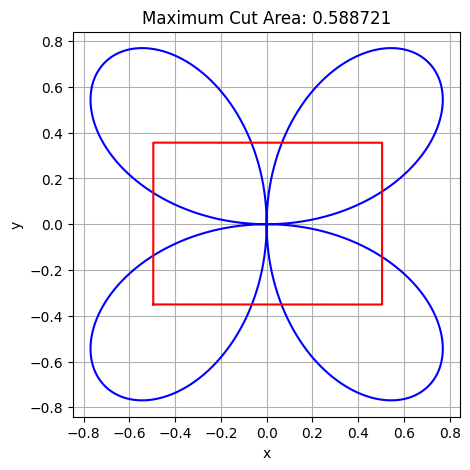

In [28]:
# Create a plot to visualize the result
plt.figure(figsize=(5, 5))

# Plot the rose curve
t = np.linspace(0, 2 * np.pi, 20000)
r = np.sin(2 * t)
x_rose = r * np.cos(t)
y_rose = r * np.sin(t)
plt.plot(x_rose, y_rose, 'b-', label='Rose Curve')

# Plot the optimally positioned cut rectangle
rect_corners = np.array([
    [-0.5, -np.sqrt(2) / 4],
    [0.5, -np.sqrt(2) / 4],
    [0.5, np.sqrt(2) / 4],
    [-0.5, np.sqrt(2) / 4],
    [-0.5, -np.sqrt(2) / 4]
])
rotated_corners = np.zeros_like(rect_corners)
rotated_corners = transformation(rect_corners, best_state)
plt.plot(rotated_corners[:, 0], rotated_corners[:, 1], 'r-')

plt.axis('equal')
plt.grid(True)
plt.title(f'Maximum Cut Area: {max_cut:.6f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Problem 3

In [15]:
import time
# Given parameters
a, w, v0 = 100, 44, 88
k = w / v0

In [16]:

def slope(x, y):
    if abs(x) < 1e-10:  # Avoid division by zero
        return -k  # As x approaches 0, y/x approaches the slope at origin
    return y / x - k * np.sqrt(1 + (y / x)**2)

def forward_euler(x0, xn, y0, n, slope):
    x = np.linspace(x0, xn, n)
    h = (xn - x0) / (n - 1)
    y = np.zeros(n)
    y[0] = y0
    
    for i in range(n-1):
        slope_val = slope(x[i], y[i])
        y[i + 1] = h * slope_val + y[i]
    
    return x, y

def Heun(x_start, x_end, y_start, n_steps, slope):
    x = np.linspace(x_start, x_end, n_steps)
    h = (x_end - x_start) / (n_steps - 1)
    y = np.zeros(n_steps)
    y[0] = y_start
    
    for i in range(n_steps-1):
        k1 = slope(x[i], y[i])
        k2 = slope(x[i + 1], y[i] + h * k1)
        y[i + 1] = y[i] + h * (k1 + k2) / 2
    
    return x, y

def RK4(x0, xn, y0, n, slope):
    x = np.linspace(x0, xn, n)
    h = (xn - x0) / (n - 1)
    y = np.zeros(n)
    y[0] = y0
    
    for i in range(n-1):
        k1 = slope(x[i], y[i])
        k2 = slope(x[i] + h / 2, y[i] + h * k1 / 2)
        k3 = slope(x[i] + h / 2, y[i] + h * k2 / 2)
        k4 = slope(x[i] + h, y[i] + h * k3)
        k = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y[i + 1] = y[i] + h * k
    
    return x, y

In [17]:
def plot_trajectories(n_steps):
    _, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
    
    # Forward Euler plot
    start_time = time.time()
    x_forward, y_forward = forward_euler(a, 0, 0, n_steps, slope)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Forward Euler execution time: {execution_time:.6f} seconds")
    print(f"Forward Euler method final destination: ({float(x_forward[-1]), float(y_forward[-1])})")
    ax1.plot(x_forward, y_forward, "r--", label = "Forward Euler", linewidth = 1, alpha = 0.3)
    ax1.plot(x_forward, y_forward, "r.", markersize = 5, alpha = 0.3, label = "Euler Points")
    ax1.grid(True)
    ax1.set_xlabel("Distance East of Airport (miles)")
    ax1.set_ylabel("Distance North of Airport (miles)")
    ax1.set_title("Forward Euler Method")
    
    ax1.plot(0, 0, "mo", label = "Airport", markersize = 10)
    ax1.plot(a, 0, "ko", label = "Starting Point", markersize = 10)
    ax1.set_xlim(-5, a + 5)
    ax1.set_ylim(0, max(y_forward) + 5)
    ax1.legend()
    
    # Heun plot
    start_time = time.time()
    x_heun, y_heun = Heun(a, 0, 0, n_steps, slope)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Heun execution time: {execution_time:.6f} seconds")
    print(f"Heun's method final destination: ({float(x_heun[-1]), float(y_heun[-1])})")
    ax2.plot(x_heun, y_heun, "b--", label = "Heun", linewidth = 1, alpha = 0.3)
    ax2.plot(x_heun, y_heun, "b.", markersize = 5, alpha = 0.3, label = "Heun Points")
    ax2.grid(True)
    ax2.set_xlabel("Distance East of Airport (miles)")
    ax2.set_ylabel("Distance North of Airport (miles)")
    ax2.set_title("Heun's Method")
    
    ax2.plot(0, 0, "mo", label = "Airport", markersize = 10)
    ax2.plot(a, 0, "ko", label = "Starting Point", markersize = 10)
    ax2.set_xlim(-5, a + 5)
    ax2.set_ylim(0, max(y_heun) + 5)
    ax2.legend()

    # RK4 plot
    start_time = time.time()
    x_rk4, y_rk4 = RK4(a, 0, 0, n_steps, slope)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"RK4 execution time: {execution_time:.6f} seconds")
    print(f"RK4 method final destination: ({x_rk4[-1], y_rk4[-1]})")
    ax3.plot(x_rk4, y_rk4, "g--", label="RK4", linewidth = 1, alpha = 0.3)
    ax3.plot(x_rk4, y_rk4, "g.", markersize = 5, alpha = 0.3, label="RK4 Points")
    ax3.grid(True)
    ax3.set_xlabel("Distance East of Airport (miles)")
    ax3.set_ylabel("Distance North of Airport (miles)")
    ax3.set_title("RK4 Method")
    
    ax3.plot(0, 0, "mo", label = "Airport", markersize = 10)
    ax3.plot(a, 0, "ko", label = "Starting Point", markersize = 10)
    ax3.set_xlim(-5, a + 5)
    ax3.set_ylim(0, max(y_rk4) + 5)
    ax3.legend()
    
    plt.suptitle("Plane Trajectory under South Wind", y = 1.05)
    plt.tight_layout()
    plt.show()

Forward Euler execution time: 0.003968 seconds
Forward Euler method final destination: ((0.0, 0.894531595178567))
Heun execution time: 0.004000 seconds
Heun's method final destination: ((0.0, 1.1680480732087228))
RK4 execution time: 0.009072 seconds
RK4 method final destination: ((np.float64(0.0), np.float64(0.7328304416623268)))


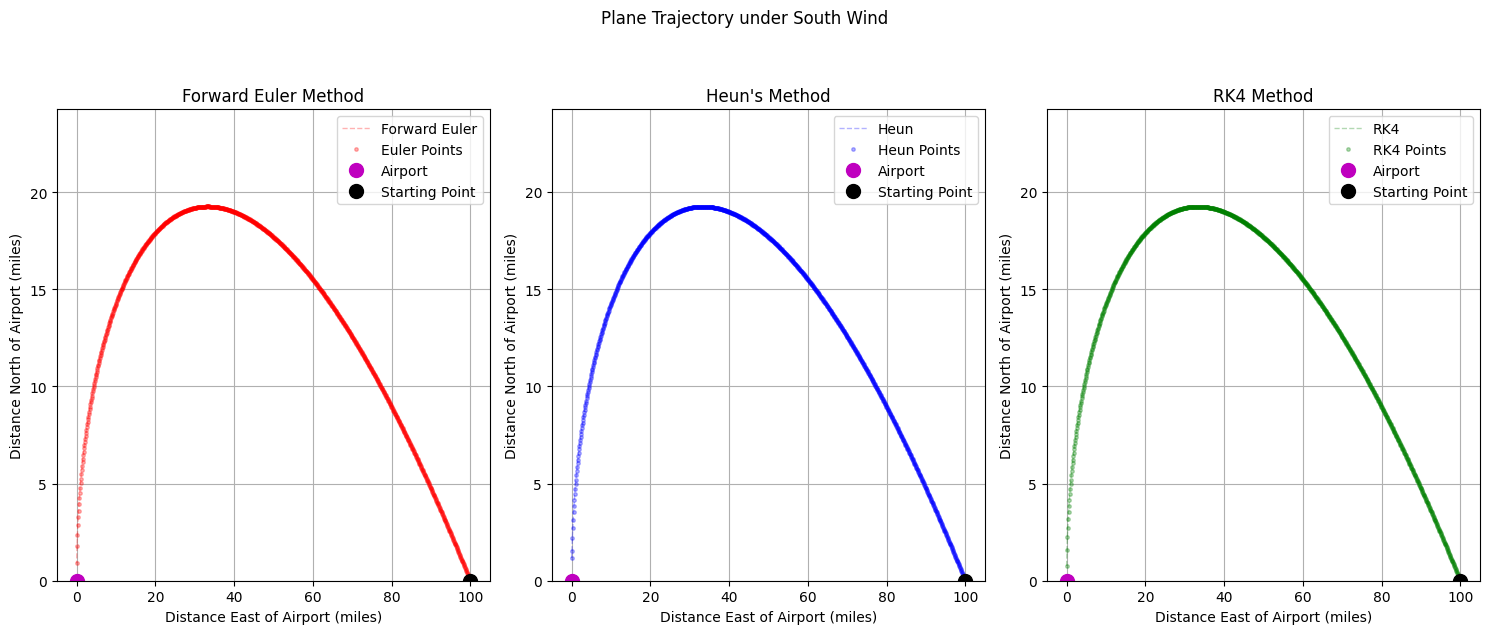

In [18]:
plot_trajectories(1000)